In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as Function

import matplotlib.pyplot as plt

# Data 

class Data(object):
    def __init__(self):
        # unsqueeze 一維轉成二維 [1,2,3] -> [[1,2,3]]  (3) -> (3,1)
        self.x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) 
        self.y = self.x.pow(2) + 0.2*torch.rand(self.x.size())

        self.x , self.y = Variable(self.x) , Variable(self.y)
        
    def get_data(self):
        return self.x , self.y

In [2]:
config = {
    'epoch':500,
    'lr': 0.001
}

In [3]:
def draw(x,y):
    plt.scatter(x,y)
    plt.show()    

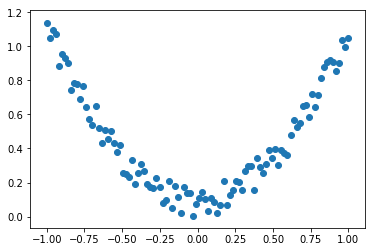

In [4]:
# print Data
data = Data()

x,y = data.get_data()

draw(x.data.numpy(),y.data.numpy())



In [5]:
# Create Net

class Net(torch.nn.Module):
    def __init__(self,n_feature=1,n_hidden=1,n_label=1):
        super(Net,self).__init__()
        
        # Define Network
        # 這樣不代表已經建好神經網路
        self.hidden_layer = torch.nn.Linear(n_feature,n_hidden)
        self.output_layer = torch.nn.Linear(n_hidden,n_label)
        
        
    def forward(self,x):
        x = Function.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        
        return x


In [6]:
#開始建立

net = Net(1,10,1)

print(net) # 查看結構


1 10
Net (
  (hidden_layer): Linear (1 -> 10)
  (output_layer): Linear (10 -> 1)
)


In [7]:
y.data.type()

'torch.FloatTensor'

In [8]:
# 給 optimizer 全部的參數 -> net.parameters()

optimizer = torch.optim.Adam(net.parameters(),lr=config['lr'])
loss_func = torch.nn.MSELoss()

net.train() # 設置 model 為 trainning mode

for step in range(config['epoch']):
    out = net(x)
    loss = loss_func(out,y)
    
    if step%50 == 0:
        print("Epoch[{}/{}] loss:{}".format(step,config['epoch'],loss.data.numpy()))
    
    optimizer.zero_grad() # 初始梯度，上一次保留的梯度刪除
    loss.backward()
    optimizer.step() # 優化

Epoch[0/500] loss:[0.14059214]
Epoch[50/500] loss:[0.09509379]
Epoch[100/500] loss:[0.07939775]
Epoch[150/500] loss:[0.06515148]
Epoch[200/500] loss:[0.0517334]
Epoch[250/500] loss:[0.04017491]
Epoch[300/500] loss:[0.03048612]
Epoch[350/500] loss:[0.02200134]
Epoch[400/500] loss:[0.01545084]
Epoch[450/500] loss:[0.01110379]


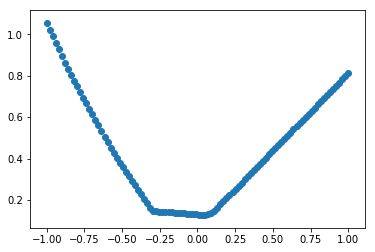

In [9]:
net.eval() # evaluation model

predict = net(x)
predict = predict.data.numpy()

draw(x.data.numpy(),predict)

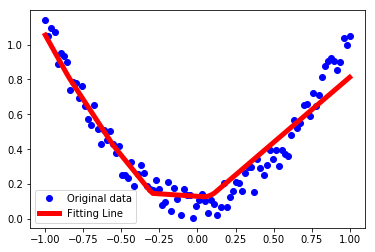

In [10]:
plt.plot(x.data.numpy(), y.data.numpy(), 'bo', label='Original data')
plt.plot(x.data.numpy(), predict, color='red',linewidth=5,label='Fitting Line')
plt.legend() 
plt.show()